In [97]:
import qiskit 
import numpy as np
import math
import random
import pandas as pd

from qiskit import IBMQ
IBMQ.save_account('3ccb2d17a0f19c3ce64cf44b3e1c90d3369ea562672f7315624ee8d92bb4350e10b643e3b2af92eef73c029e051518c2a833fb0ffa2e600b2c6c65ed5dd29d40')
IBMQ.load_account()
from qiskit import *
import math as m
import time
from copy import deepcopy
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
#simulators
S_simulator = Aer.backends(name = 'statevector_simulator')[0]
M_simulator = Aer.backends(name = 'qasm_simulator')[0]
U_simulator = Aer.backends(name = 'unitary_simulator')[0]
#provider = IBMQ.get_provider(hub = 'ibm-q-research')


configrc.store_credentials:WARNING:2022-10-27 16:46:47,911: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-27 16:46:53,947: Credentials are already in use. The existing account in the session will be replaced.


In [98]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

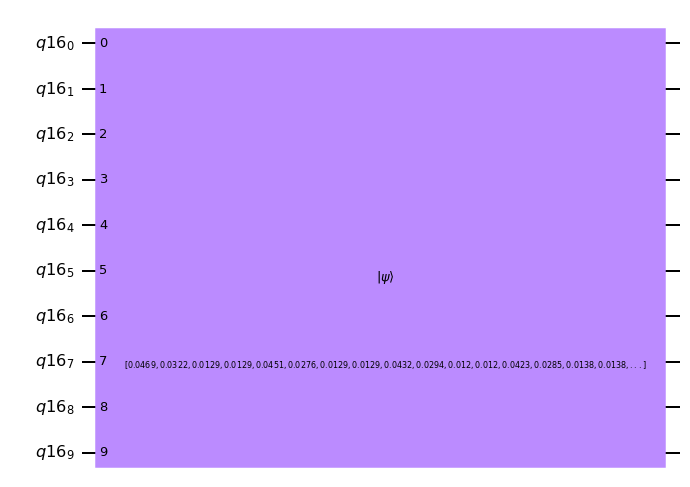

In [96]:
#amplitude encoding 
# total amplitudes to be encoded = features*total_instances = 600
# total computatuional basis states available = 2**10 = 1024 
# redundant states = 1024 - 600 = 424

features = 4
total_instances = 150
num_qubits = int(math.log(features*total_instances,2)) +1 
redundant_basis_states = 2**num_qubits - features*total_instances
redundant_basis_states_list = list(np.zeros(redundant_basis_states,dtype = int))
q = QuantumRegister(num_qubits)
qc = QuantumCircuit(q)
Vector = []
for i in range(total_instances):
    vector = [iris['Sepal_Length'][i],iris['Sepal_Width'][i],iris['Petal_Length'][i],iris['Petal_Length'][i] ]
    #Vector = list(np.concatenate(vector))
    Vector.append(vector)
    #Vector = Vector.append(redundant_basis_states_list)
final_state = list(np.concatenate(Vector))
Final_state = final_state + redundant_basis_states_list
normalized_state = (Final_state / np.linalg.norm(Final_state)) 
qc.initialize(normalized_state)
qc.draw('mpl')
# the corresponding state contains all 600 amplitudes 